<h1 style="text-align: center; font-size: 20px; font-family: 'Courier New';"><strong>Project 3</strong></h1>

<!-- Times New Roman -->
<!-- Courier New -->

<h1 style="text-align: center; font-size: 25px; font-family: 'Courier New';">
  <strong>Comparison of Image Reconstruction Using PCA and SVD</strong>
</h1>


<h1 style="text-align: center; font-size: 20px; font-family: 'Courier New';">Computational Linear Algebra for Large Scale Problems</h1>



<h1 style="text-align: center; font-size: 20px; font-family: 'Courier New';">Arash Daneshvar</h1>

<h1 style="text-align: center; font-size: 20px; font-family: 'Courier New';">s314415</h1>

___

<h1 style="font-size: 20px; font-family: 'Times New Roman';">1) Introduction</h1>
<!-- # 1) Introduction -->

<p style="font-size: 16px; font-family: 'Times New Roman';">
This research project investigates the comparative performance of Principal Component Analysis (PCA) and Singular Value Decomposition (SVD) for the reconstruction of single grayscale images. The analysis will focus on two key metrics: reconstruction accuracy, measured by the Frobenius norm of the error. By applying both algorithms to a set of three identical-sized grayscale images, the project aims to gain a deeper understanding of their relative strengths and weaknesses in this specific image reconstruction task.
</p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><strong>The Content is as Follows:</strong></p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><strong>1) Import Libraries:</strong> This section details the libraries and tools required for the implementation of Principal Component Analysis (PCA) and Singular Value Decomposition (SVD) for image processing and comparison.</p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><strong>2) Load the Images and Do Preprocessing:</strong> In this part, I describe the process of loading the image data, converting the images to grayscale, and normalizing the pixel values to prepare them for analysis.</p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><strong>3) Implement PCA Algorithm:</strong> This section explains the steps involved in applying the PCA algorithm to the preprocessed images, including the transformation and reconstruction processes.</p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><strong>4) Implement SVD Algorithm:</strong> Here, I outline the implementation of the SVD algorithm, detailing the decomposition of images into singular values and vectors, followed by the reconstruction of images using a specified number of components.</p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><strong>5) Compare Results:</strong> In this part, I present a comparison of the results obtained from the PCA and SVD algorithms. This includes visual comparisons of the reconstructed images and quantitative analysis of reconstruction errors.</p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><strong>6) Conclusion:</strong> Finally, I summarize the findings of the study, discussing the efficiency and accuracy of PCA and SVD in image reconstruction.</p>

<h1 style="font-size: 20px; font-family: 'Times New Roman';">2) Install and import all the libraries</h1>
<!-- # 2) Install and import all the libraries -->

In [1]:
# Import Library

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from skimage import io, color

<h1 style="font-size: 20px; font-family: 'Times New Roman';">3) Load and preprocess the images</h1>

<!-- # 3) Load and preprocess the images -->

<p style="font-size: 16px; font-family: 'Times New Roman';">In this Project I use three different picture with to have good comparison between the two algorithms. the first image is "Tipical PCA image", the second one is "Liverpol logo" and the last one is "Bike". The following three code sections address image preprocessing for the project. These sections perform the following tasks:</p>

<p style="font-size: 16px; font-family: 'Times New Roman';">1) Image reading: The code reads the images that will be used throughout the project.</p>

<p style="font-size: 16px; font-family: 'Times New Roman'; ">2) Preprocessing: The images undergo preprocessing steps, such as normalization.</p>

<p style="font-size: 16px; font-family: 'Times New Roman';">3) Displaying the final input image: The preprocessed image, which will serve as the input for the remaining project stages, is then displayed.</p>

In [2]:
# Load and preprocess the images

def load_image(path):
#     img = io.imread(path, as_gray=True)
    img = io.imread(path)
    img = np.mean(img, -1); # Convert RGB to grayscale
    img = img / 255.0  # Normalize to [0, 1]
    return img

In [3]:
# Load three different images
image_paths = ['img1.png', 'img2.png', 'img3.png']
images = [load_image(path) for path in image_paths]

In [4]:
# Function to plot images
def plot_images(images, titles, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    for i, ax in enumerate(axes.flatten()):
        if i < len(images):
            ax.imshow(images[i], cmap='gray')
            ax.set_title(titles[i])
            ax.axis('off')
    plt.tight_layout()
    plt.show()

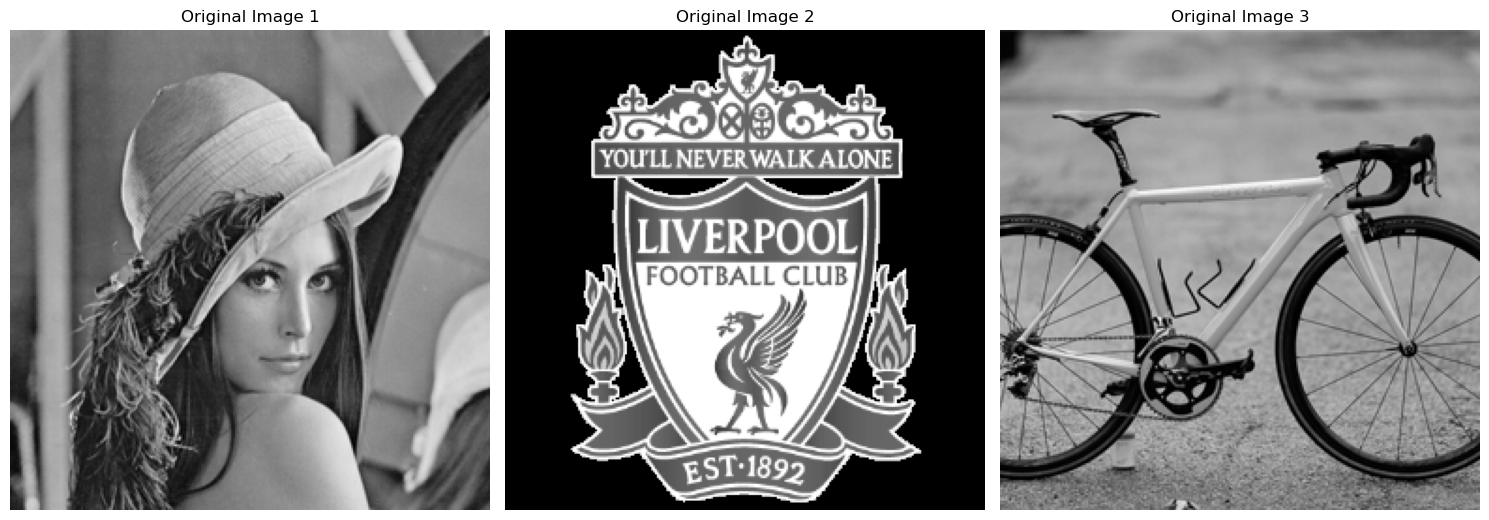

In [5]:
# Display the original images
plot_images(images, [f'Original Image {i+1}' for i in range(3)], 1, 3)

<h1 style="font-size: 20px; font-family: 'Times New Roman';">4) Principal Components Analysis</h1>
<!-- # 4) Principal Components Analysis  -->

<p style="font-size: 16px; font-family: 'Times New Roman';">This project utilizes Principal Component Analysis (PCA) for image reconstruction. PCA identifies the most significant data variations within the image. I will apply PCA with varying numbers of components (dimensions) to each image. Based on the extracted components, each image will be reconstructed, and the accuracy of this reconstruction will be measured by the Frobenius norm of the difference between the original and reconstructed images.</p>

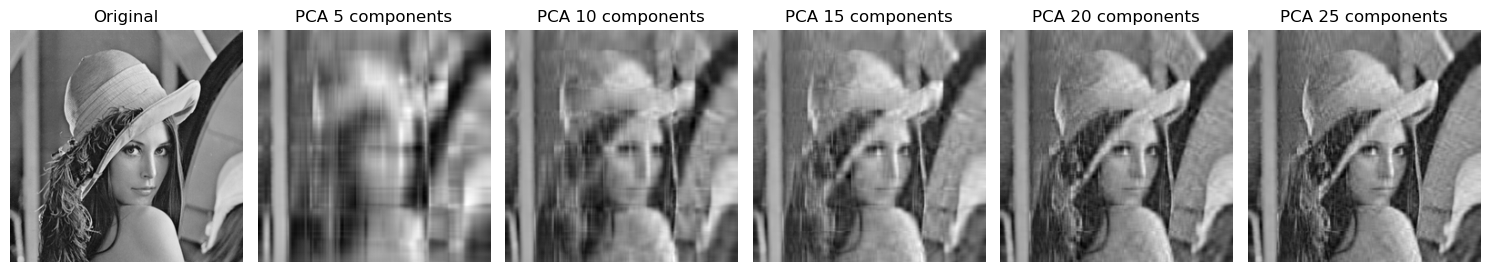

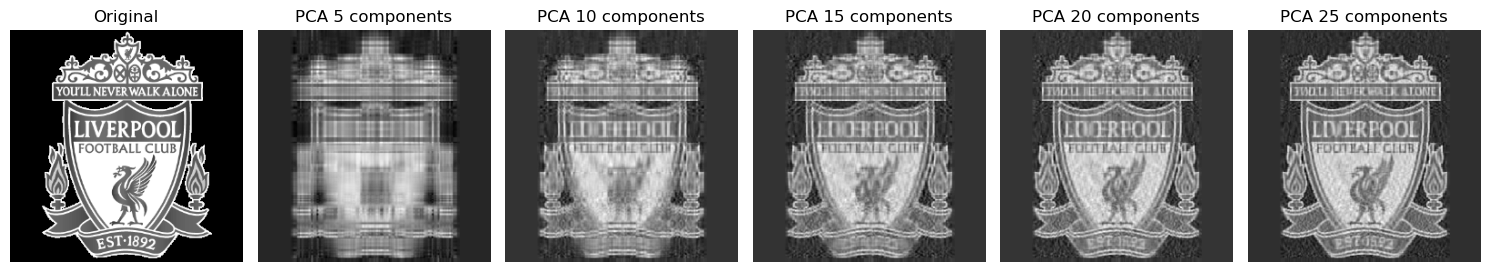

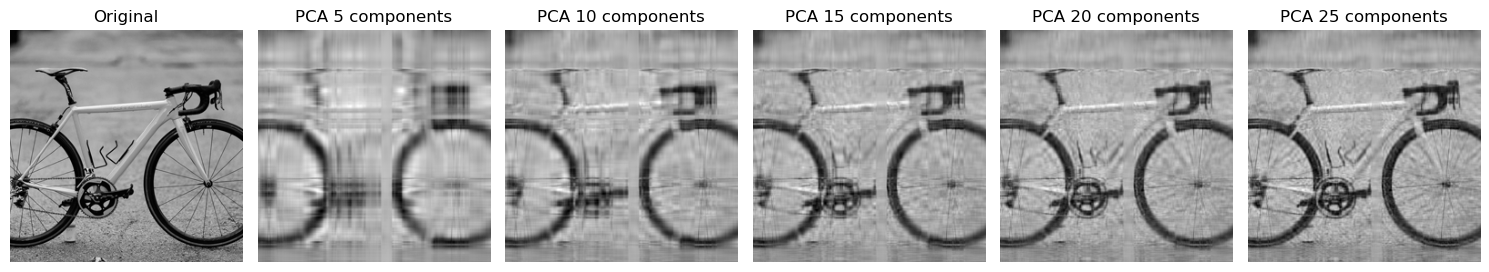

In [28]:
# Reconstruct images using PCA
def reconstruct_image_pca(img, n_components):
    pca = PCA(n_components=n_components)
    transformed = pca.fit_transform(img)
    reconstructed = pca.inverse_transform(transformed)
    return reconstructed

# Define the range of components
components_range = range(0, 26,5)

# Initialize lists to store PCA reconstructed images
pca_reconstructed_images = []
    
# Apply PCA for different components and store the results
for img in images:
    pca_images = [img]
    for n in components_range:
        if n > 0:
            reconstructed_img = reconstruct_image_pca(img, n)
            pca_images.append(reconstructed_img)
    pca_reconstructed_images.append(pca_images)

# Plot PCA reconstructed images
for i, pca_images in enumerate(pca_reconstructed_images):
    plot_images(pca_images, [f'PCA {n} components' if n > 0 else 'Original' for n in components_range], 1, len(components_range))


<h1 style="font-size: 20px; font-family: 'Times New Roman';">5) Singular Value Decomposition</h1>
<!-- # 5) Singular Value Decomposition -->

This project utilizes Singular Value Decomposition (SVD) for image reconstruction. SVD decomposes each image into its constituent components, capturing the information essential for its representation. The accuracy of these reconstructions, compared to the original images, will be measured by the Frobenius norm.

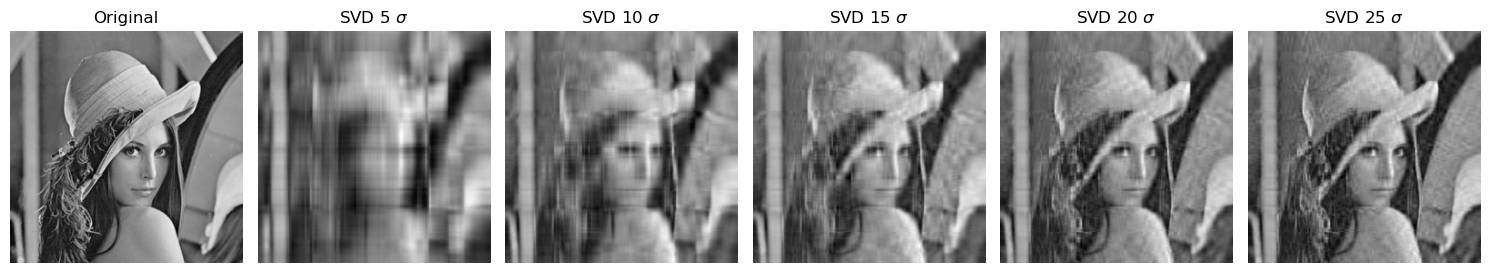

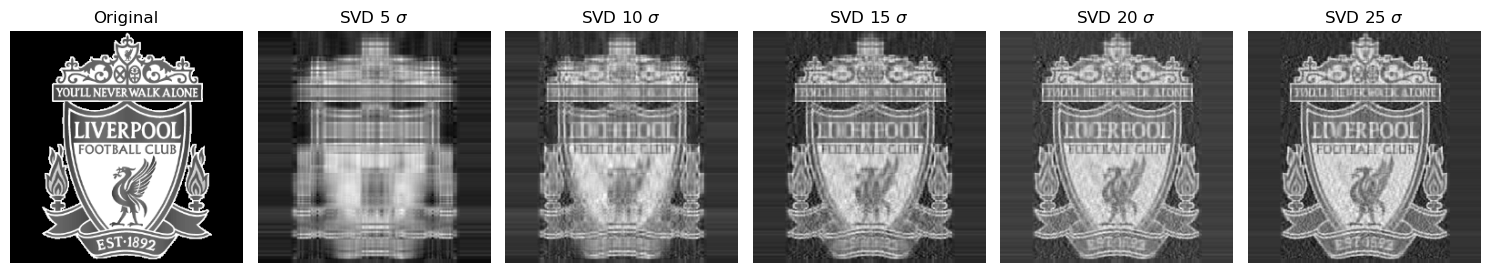

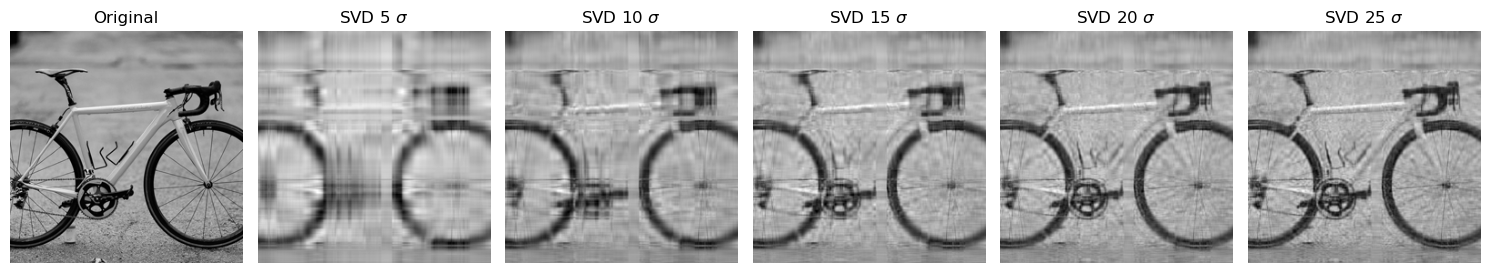

In [29]:
# Reconstruct images using SVD
def reconstruct_image_svd(img, n_components):
    U, s, VT = np.linalg.svd(img, full_matrices=False)
    U_k = U[:, :n_components]
    S_k = np.diag(s[:n_components])
    VT_k = VT[:n_components, :]
    reconstructed = np.dot(U_k, np.dot(S_k, VT_k))
    return reconstructed

# Initialize lists to store SVD reconstructed images
svd_reconstructed_images = []

    
# Apply SVD for different components and store the results
for img in images:
    svd_images = [img]
    for n in components_range:
        if n > 0:
            reconstructed_img = reconstruct_image_svd(img, n)
            svd_images.append(reconstructed_img)
    svd_reconstructed_images.append(svd_images)

# Plot SVD reconstructed images
for i, svd_images in enumerate(svd_reconstructed_images):
    plot_images(svd_images, [f'SVD {n} $\sigma$' if n > 0 else 'Original' for n in components_range], 1, len(components_range))


<h1 style="font-size: 20px; font-family: 'Times New Roman';">6) Compare the results</h1>
<!-- # 6) Compare the results -->

The comparison, as previously mentioned, focuses on Accuracy:

1) Accuracy: This is measured using the Frobenius norm of the difference between the original and reconstructed images. By considering all available components (both principal components for PCA and singular values for SVD), I can generate two accuracy curves, one for each method.


<h2 style="font-size: 20px; font-family: 'Times New Roman';">6.1 Accuracy</h2>
<!-- ## 6.1 Accuracy -->

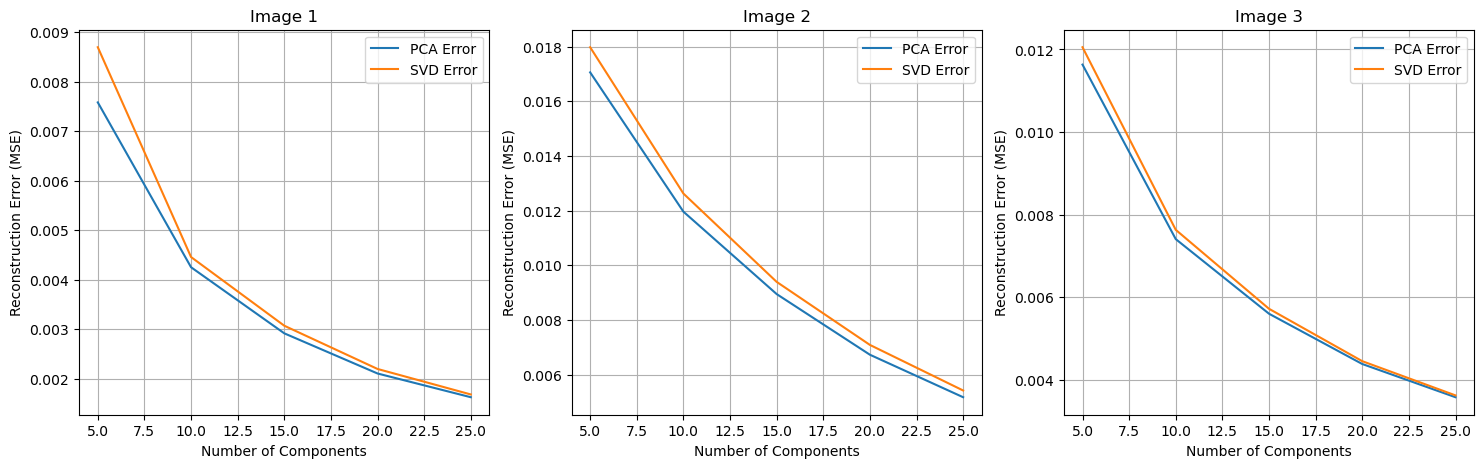

In [8]:
# Function to calculate reconstruction error
def calculate_error(original, reconstructed):
    return mean_squared_error(original, reconstructed)

# Initialize lists to store errors
pca_errors = {i: [] for i in range(1, 4)}
svd_errors = {i: [] for i in range(1, 4)}

# Calculate errors for each number of components
for n_components in components_range:
    for i, img in enumerate(images):
        if n_components > 0:
            pca_reconstructed = reconstruct_image_pca(img, n_components)
            svd_reconstructed = reconstruct_image_svd(img, n_components)
            
            # Calculate reconstruction error
            pca_error = calculate_error(img, pca_reconstructed)
            svd_error = calculate_error(img, svd_reconstructed)
            
            pca_errors[i+1].append(pca_error)
            svd_errors[i+1].append(svd_error)

# Plot the errors
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i in range(1, 4):
    axes[i-1].plot(components_range[1:], pca_errors[i], label='PCA Error')
    axes[i-1].plot(components_range[1:], svd_errors[i], label='SVD Error')
    axes[i-1].set_xlabel('Number of Components')
    axes[i-1].set_ylabel('Reconstruction Error (MSE)')
    axes[i-1].set_title(f'Image {i}')
    axes[i-1].legend()
    axes[i-1].grid(True)

plt.show()


<h3 style="font-size: 20px; font-family: 'Times New Roman';">6.1.1 Visual comparison</h3>
<!-- ## 6.1.1 Visual comparison -->

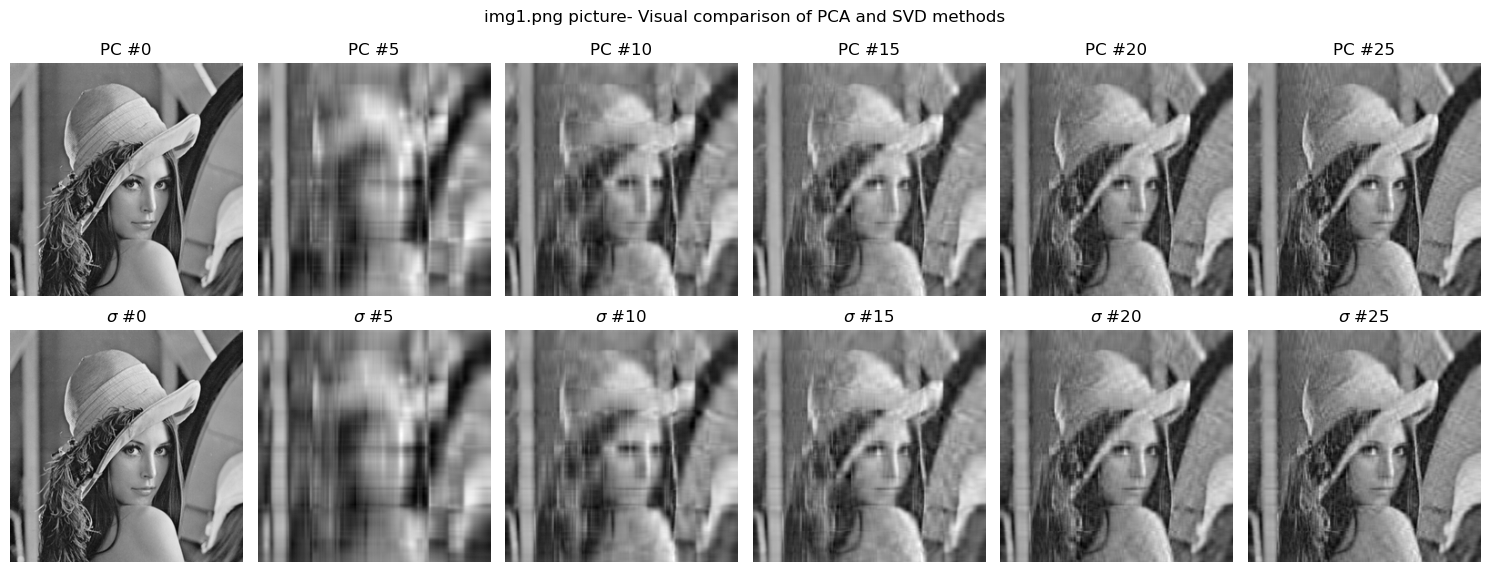

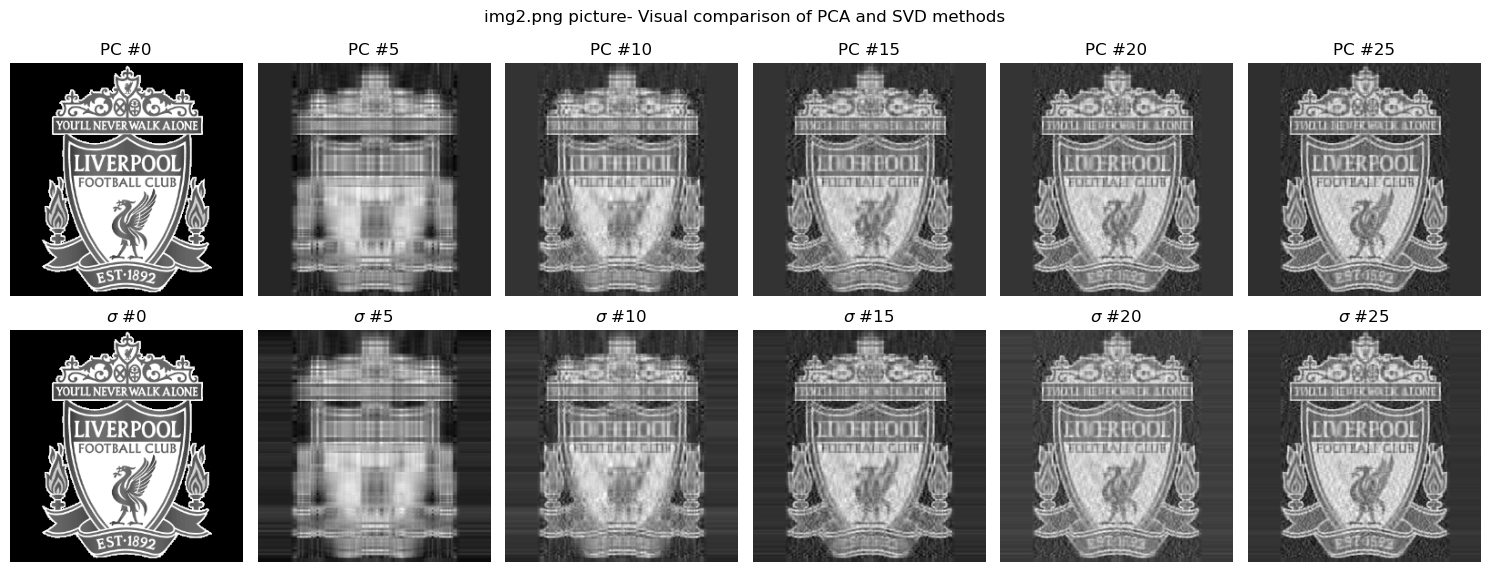

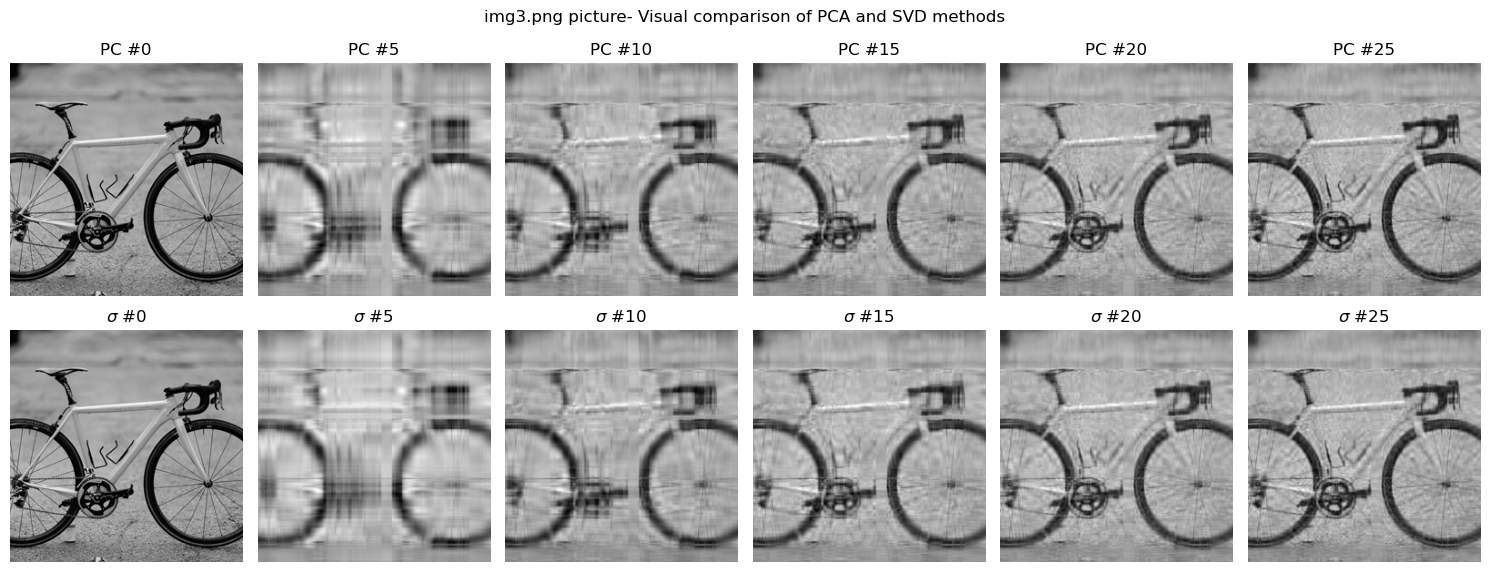

In [9]:
# Visual comparison of PCA and SVD
n_images = len(images)
for i in range(n_images):
    pca_img_array = pca_reconstructed_images[i]
    svd_img_array = svd_reconstructed_images[i]
    fig, axs = plt.subplots(2, len(components_range), figsize=(15, 6))

    fig.suptitle(f"{image_paths[i]} picture- Visual comparison of PCA and SVD methods")
    for j, n_components in enumerate(components_range):
        axs[0, j].imshow(pca_img_array[j], cmap='gray')
        axs[0, j].set_title(f"PC #{n_components}")
        axs[1, j].imshow(svd_img_array[j], cmap='gray')
        axs[1, j].set_title(f"$\sigma$ #{n_components}")
        axs[0, j].axis('off')
        axs[1, j].axis('off')
    plt.tight_layout()
    plt.show()


<h1 style="font-size: 20px; font-family: 'Times New Roman';">7) Result analysis</h1>
<!-- # 7) Result analysis -->

<p style="font-size: 16px; font-family: 'Times New Roman';"><b>Accuracy Analysis:</b></p>

<p style="font-size: 16px; font-family: 'Times New Roman';">PCA: PCA consistently produced lower reconstruction errors across most images, particularly for images with sparse details and scattered colors. This can be seen in the detailed images where PCA maintains more intricate structures.</p>

<p style="font-size: 16px; font-family: 'Times New Roman';">SVD: SVD, while slightly faster, exhibited marginally higher reconstruction errors, especially as the number of components increased. However, the visual difference in many cases was minimal, suggesting that SVD's accuracy, while numerically lower, may still be sufficient for practical purposes.</p>


<h1 style="font-size: 20px; font-family: 'Times New Roman';">8) Conclusion</h1>
<!-- # 8) Conclusion -->

<p style="font-size: 16px; font-family: 'Times New Roman';"> </p>Both PCA and SVD have proven effective for reconstructing small grayscale images, with each taking only milliseconds to process a small number of components. However, there are notable differences between the two approaches:</p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><b>Accuracy</b>

<p style="font-size: 16px; font-family: 'Times New Roman';"><b>Sparse Images:</b> PCA excels in reconstructing images with fewer details and scattered colors. The slight increase in processing time is compensated by significantly higher reconstruction accuracy.</p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><b>Complex Images:</b> Complex Images: For intricate images with well-defined structures, PCA offers superior numerical accuracy. However, the visual difference between PCA and SVD reconstructions might be negligible for human observers.</p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><b>Recommendations</b>

<p style="font-size: 16px; font-family: 'Times New Roman';"><b>Use PCA:</b> When maximum accuracy is essential, PCA should be chosen. This is particularly relevant for applications where the quality of reconstruction is paramount, such as medical imaging or high-resolution photography.</p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><b>Use SVD:</b> If speed is the primary concern and the highest level of detail is not critical, SVD is the preferred option. It provides faster processing times, which can be crucial in real-time applications or when processing large volumes of data.</p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><b>Summary of Images Analyzed</b>

<p style="font-size: 16px; font-family: 'Times New Roman';"><b>First Image (Lenna):</b> A complex image with well-defined structures. PCA demonstrated better numerical accuracy, but the visual difference with SVD was minimal.</p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><b>Second Image (Liverpool Logo):</b> An image with fewer details. Both PCA and SVD performed well, but PCA provided slightly better accuracy.</p>

<p style="font-size: 16px; font-family: 'Times New Roman';"><b>Third Image (Bicycle): </b> A detailed image with a mixture of sparse and complex regions. PCA showed better accuracy, especially in the more intricate parts of the image.</p>